# 1.BUSINESS UNDERSTANDING
### 1.1 Business overview
Social media platforms like Twitter have become powerful tools for expressing opinions about brands and products. Companies such as Apple and Google receive thousands of mentions daily regarding their products, services, and updates.

Analyzing this massive amount of unstructured text can help businesses understand public perception, brand reputation, and customer satisfaction.

This project focuses on building a Natural Language Processing (NLP) model that automatically classifies tweets related to Apple and Google products as positive, negative, or neutral based on the sentiment expressed in the text.

## 1.2 Problem statement
How can we automatically classify the sentiment of tweets about Apple and Google products using NLP techniques?

## 1.3 Business Objectives
`Main Objective`

To develop a machine learning model capable of accurately classifying the sentiment of tweets related to Apple and Google products as positive, negative, or neutral.

`Specific Objectives`

* To clean and preprocess raw Twitter text data for analysis.

* To explore and visualize sentiment distribution between Apple and Google products.

* To build and evaluate different NLP models for sentiment classification.

* To compare model performance and identify the best-performing model.

* To interpret results and provide insights on public opinion about Apple and Google.

## 1.4 Research Questions

1. What is the overall sentiment (positive, negative, neutral) toward Apple and Google products on Twitter?

2. Which brand receives more positive or negative mentions?

3. Can a machine learning model accurately predict tweet sentiment based on text content?

4. Which NLP techniques produce the best model performance?

# 2. DATA UNDERSTANDING
## 2.1 Data Source

The dataset was obtained from CrowdFlower and accessed through data.world:
Brands and Product Emotions Dataset

It contains over 9,000 tweets labeled with sentiments and associated brands or products.

The dataset contains 9,093 rows (tweets) and 3 columns

Multiple columns, including text, brand, product, and sentiment labels.

# 3. DATA PREPARATION
## 3.1 Overview

The data preparation process will involve:

* Importing and inspecting the dataset

* Handling missing values

* Filtering only Apple and Google tweets

* Cleaning and preprocessing tweet text

* Encoding sentiment labels

* Splitting data into training and testing sets

In [1]:
#impoerting necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df. shape

(9093, 3)

In [4]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
#checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [7]:
# Handle missing values in tweet_text
df = df.dropna(subset = ['tweet_text']).copy()

# Confirm that there are no missing values in tweet_text
df['tweet_text'].isnull().sum()

0

In [8]:
print(df['emotion_in_tweet_is_directed_at'].value_counts())

# Check missing values
print(f"Missing values in this column: {df['emotion_in_tweet_is_directed_at'].isnull().sum()}")

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64
Missing values in this column: 5801


In [9]:
#checking for duplicates
df.duplicated().sum()

22

In [10]:
#drop duplicates
df=df.drop_duplicates()

In [11]:
#rename the columns
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [12]:
#checking unique sentiments
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [13]:
# Check a few example tweets
df[['tweet', 'sentiment']].head(10)

,tweet,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion


### Cleaning the text


In [14]:
# Replace detailed sentiments with simple ones
df['sentiment'] = df['sentiment'].replace({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
})

# Check new label counts
df['sentiment'].value_counts()


sentiment
neutral     5531
positive    2970
negative     569
Name: count, dtype: int64

In [15]:
import re

# Convert all tweets to string just in case
df['tweet'] = df['tweet'].astype(str)

# Define a cleaning function
def clean_tweet(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()                           # make all lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)   # remove URLs
    text = re.sub(r'@\w+|#', '', text)            # remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)          # remove punctuation and numbers
    text = text.strip()                           # remove extra spaces
    return text

# Apply cleaning
df['clean_tweet'] = df['tweet'].apply(clean_tweet)

# Check before and after
df[['tweet', 'clean_tweet']].head(10)



,tweet,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at risea...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for ipad also they should sale t...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri sxsw marissa mayer google t...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps for speechtherapy and communicat...
7,"#SXSW is just starting, #CTIA is around the co...",sxsw is just starting ctia is around the corne...
8,Beautifully smart and simple idea RT @madebyma...,beautifully smart and simple idea rt wrote a...
9,Counting down the days to #sxsw plus strong Ca...,counting down the days to sxsw plus strong can...
10,Excited to meet the @samsungmobileus at #sxsw ...,excited to meet the at sxsw so i can show the...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20940\3540181936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


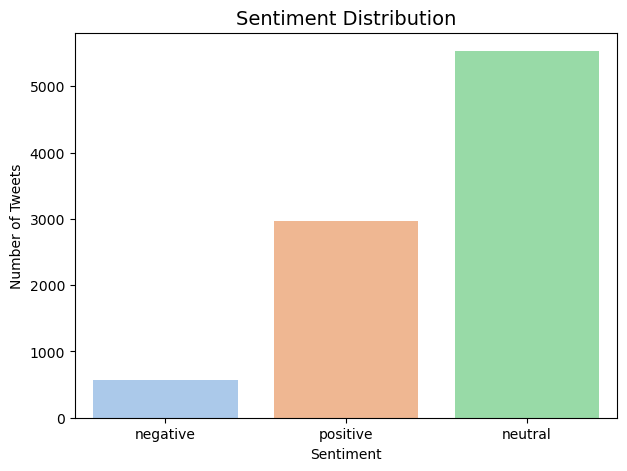

In [18]:
#distribution of sentiment
plt.figure(figsize=(7,5))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [22]:
brand_mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple', 
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google', 
    'Android': 'Google'
}

# Apply the mapping 
df['brand_category'] = df['product'].map(brand_mapping).fillna('Other/Unknown')

# Check Value counts of the new column
print(df['brand_category'].value_counts())

brand_category
Other/Unknown    5788
Apple            2404
Google            878
Name: count, dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20940\4232671203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='cool')


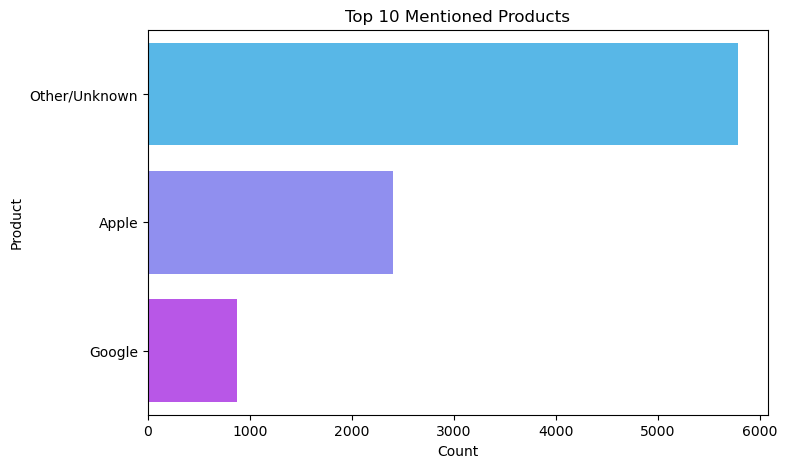

In [25]:
#top 10 products
top_products = df['brand_category'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='cool')
plt.title('Top 10 Mentioned Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20940\202937148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')


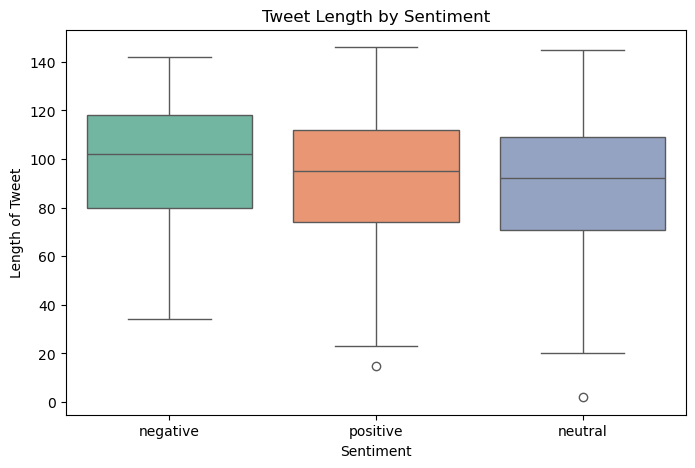

In [26]:
df['tweet_length'] = df['clean_tweet'].apply(len)

plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Tweet')
plt.show()


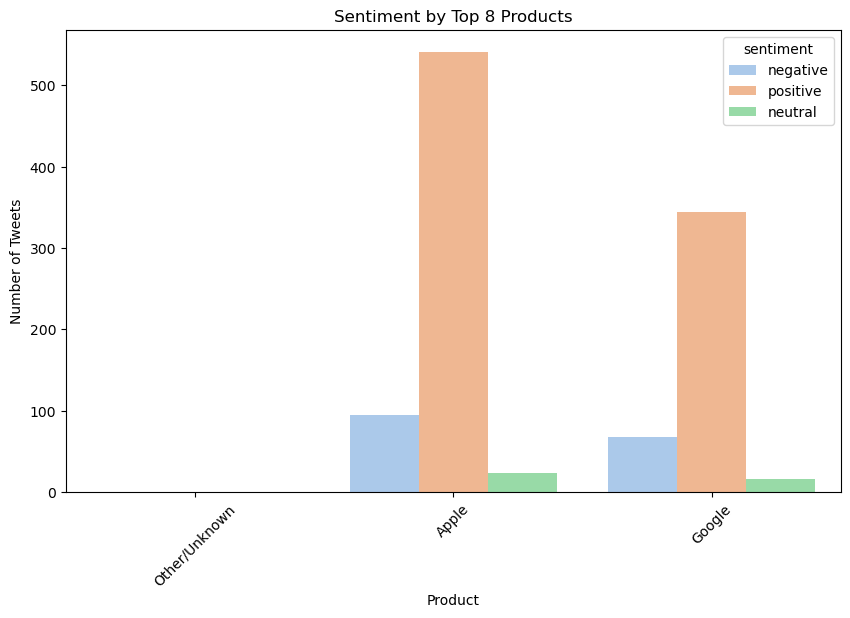

In [29]:
#sentiment by product
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='product',hue='sentiment',palette='pastel',order=df['brand_category'].value_counts().iloc[:8].index)
plt.title('Sentiment by Top 8 Products')
plt.xlabel('Product')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20940\3420069185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand_category', data=df, palette='pastel')


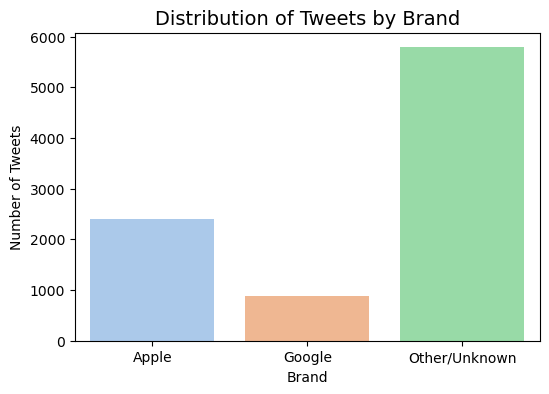

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='brand_category', data=df, palette='pastel')
plt.title('Distribution of Tweets by Brand', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.show()


In [32]:
#Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['sentiment'])

# See how labels were encoded
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


{'negative': 0, 'neutral': 1, 'positive': 2}

In [33]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = df['clean_tweet']# text data
y = df['label']# numeric sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data: {len(X_train)} tweets")
print(f"Testing data: {len(X_test)} tweets")


Training data: 7256 tweets
Testing data: 1814 tweets
